**Alunos:** 
Davi Giordano Valério 11805273,
Henrique Lefundes da Silva 11808280

In [5]:
from IPython.display import Image
# get the image
Image(url="photos/photo_davi_henrique.jpg", width=400)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
v_clean = pd.read_csv("./vehicles_cleaned_train.csv")
v_clean.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan


# Exploratory Analysis

In [7]:
v_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8338 entries, 0 to 8337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         8338 non-null   int64 
 1   year          8338 non-null   int64 
 2   condition     8338 non-null   object
 3   cylinders     8338 non-null   object
 4   fuel          8338 non-null   object
 5   odometer      8338 non-null   int64 
 6   transmission  8338 non-null   object
 7   size          8338 non-null   object
 8   type          8338 non-null   object
dtypes: int64(3), object(6)
memory usage: 586.4+ KB


**Comment:** Here we can see that the dataset isn't missing any values

In [8]:
v_clean.describe()

,price,year,odometer
count,8338.000000,8338.000000,8338.000000
mean,11773.606500,2013.240585,63473.387983
std,6730.164882,4.109532,26330.405808
min,1.000000,2001.000000,0.000000
25%,7200.000000,2011.000000,45000.000000
50%,10500.000000,2014.000000,68959.500000
75%,15299.000000,2016.000000,85482.750000
max,39900.000000,2021.000000,99971.000000


**Comment:** Here we can see that the min price is 1$. Is this value correct? Also, there are cars wih odometer equal to 0. Is this correct?

## Distributions of numerical variables

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

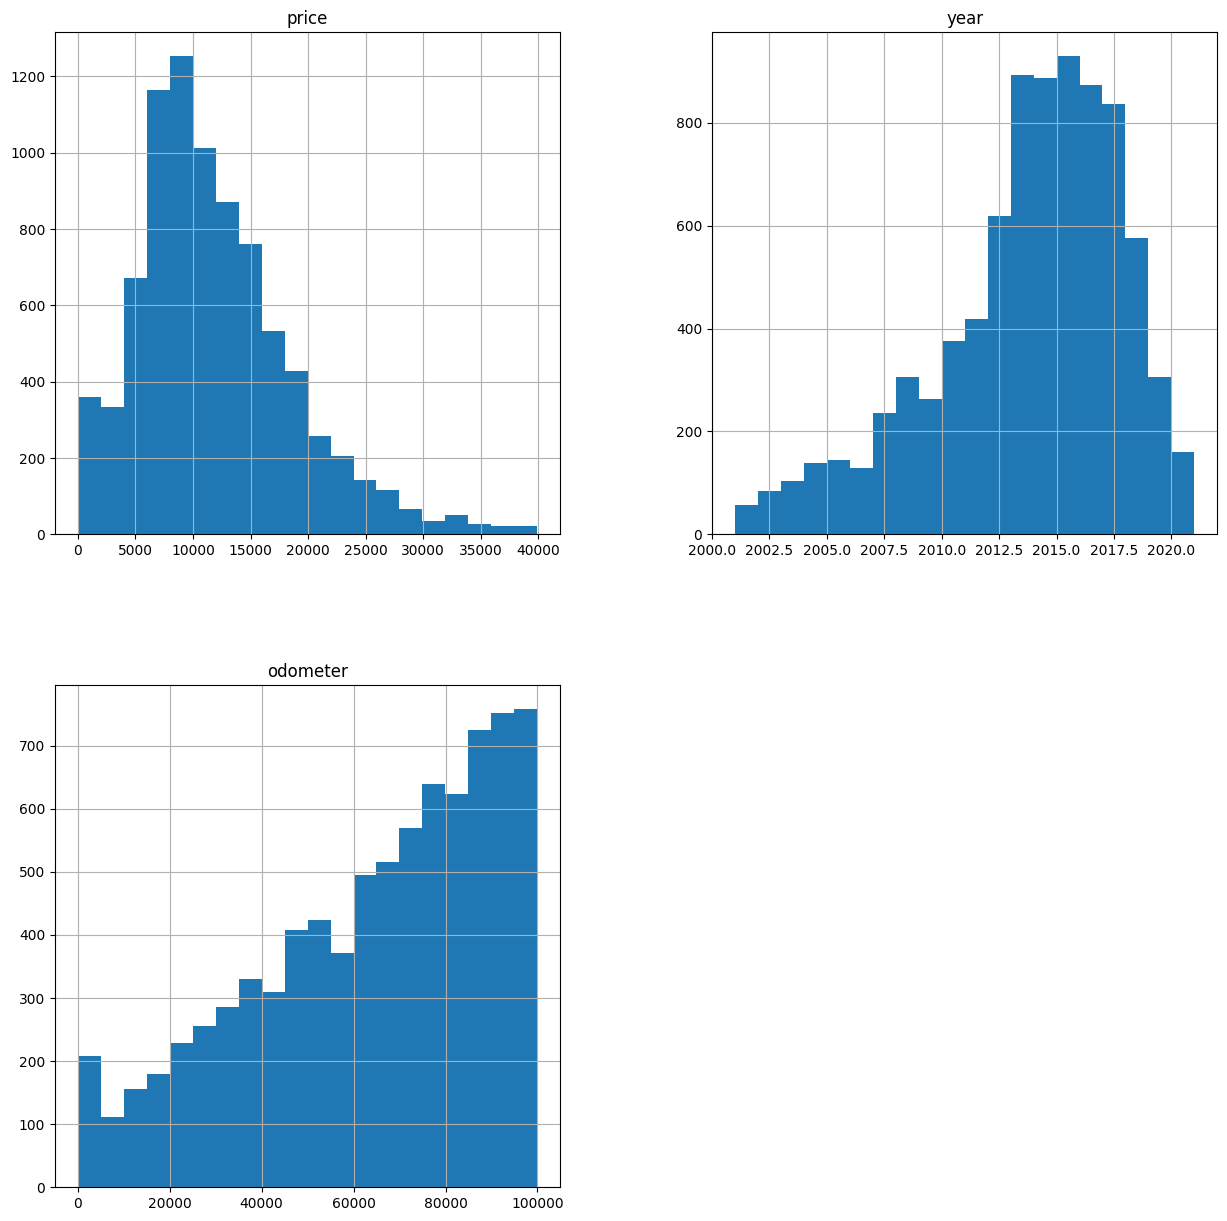

In [9]:
v_clean.hist(bins=20, figsize=(15,15))

**Comment:** Here it also possible to see the cars with 0 odometer and price equal to one. Is this dirty data that should be removed? For this exercice, we will keep them, for now.

## Looking for correlation between the numerical variables

In [10]:
corr_matrix = v_clean.corr(numeric_only=True) #Pearson
corr_matrix['price'].sort_values(ascending=False)

price       1.000000
year        0.520877
odometer   -0.380056
Name: price, dtype: float64

Text(0.5, 1.0, 'Price by year')

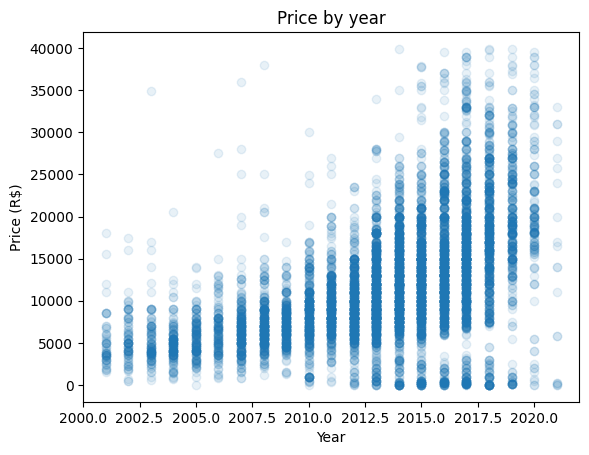

In [11]:
plt.scatter(v_clean['year'], v_clean['price'], alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Price (R$)')
plt.title('Price by year')

Text(0.5, 1.0, 'Price by Odometer')

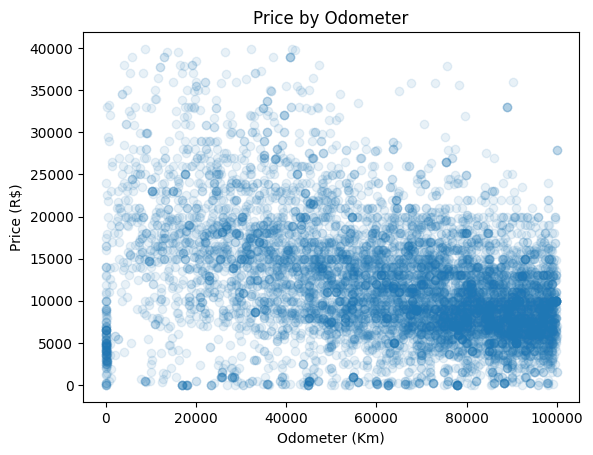

In [12]:
plt.scatter(v_clean['odometer'], v_clean['price'], alpha=0.1)
plt.xlabel('Odometer (Km)')
plt.ylabel('Price (R$)')
plt.title('Price by Odometer')

**Comment:** There is Moderate positive correlation between the year and the price; there is weak negative correlation between the odometer and the price.

## Looking for correlation among the categorical variables

Text(0.5, 1.0, 'Price by car condition')

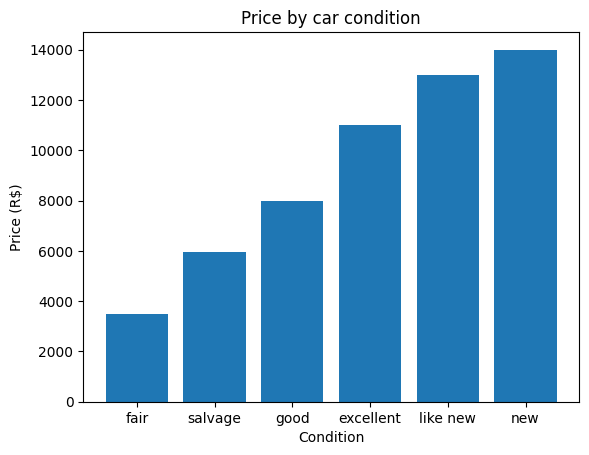

In [13]:
condition_price = v_clean.groupby('condition')['price'].median().sort_values(ascending=True)
plt.bar(condition_price.index, condition_price.values)
plt.xlabel('Condition')
plt.ylabel('Price (R$)')
plt.title('Price by car condition')

**Comment:** Here we can see, as expected, that there is a correlation between newness of car and its resell price

Text(0.5, 1.0, 'Price by num of cylinders')

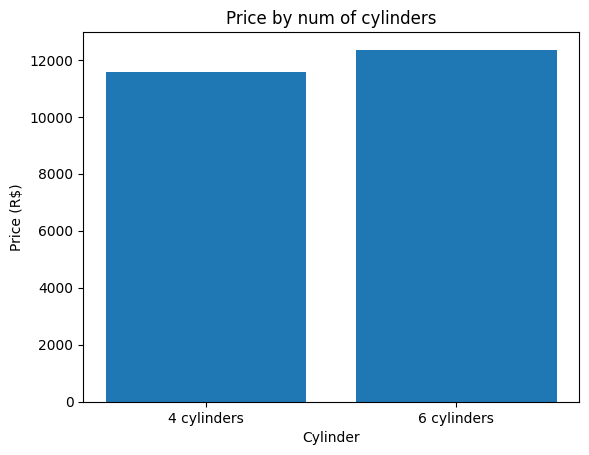

In [14]:
cylinder_price = v_clean.groupby('cylinders')['price'].mean().sort_values(ascending=True)
plt.bar(cylinder_price.index, cylinder_price.values)
plt.xlabel('Cylinder')
plt.ylabel('Price (R$)')
plt.title('Price by num of cylinders')

Text(0.5, 1.0, 'Price by type of fuel')

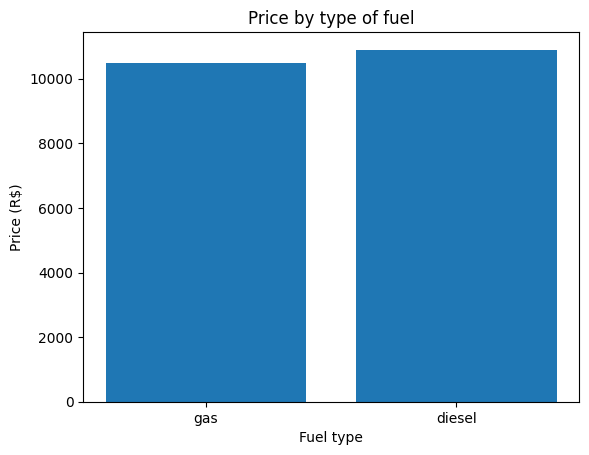

In [15]:
fuel_price = v_clean.groupby('fuel')['price'].median().sort_values(ascending=True)
plt.bar(fuel_price.index, fuel_price.values)
plt.xlabel('Fuel type')
plt.ylabel('Price (R$)')
plt.title('Price by type of fuel')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


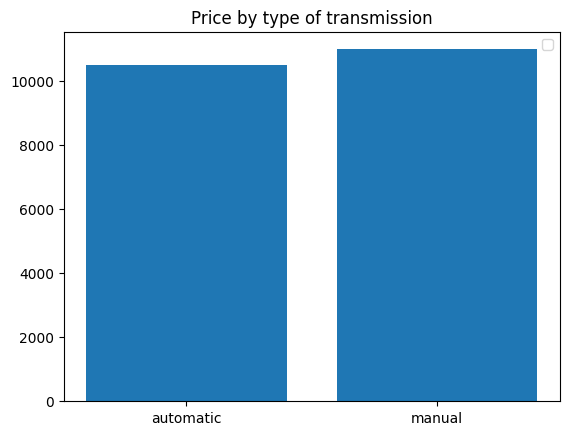

In [16]:
condition_price = v_clean.groupby('transmission')['price'].median().sort_values(ascending=True)
plt.bar(condition_price.index, condition_price.values)
plt.title('Price by type of transmission')
plt.legend()

Text(0.5, 1.0, 'Price by size')

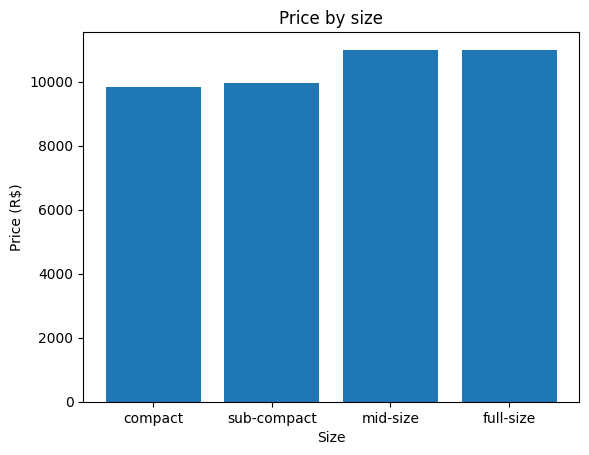

In [17]:
size_price = v_clean.groupby('size')['price'].median().sort_values(ascending=True)
plt.bar(size_price.index, size_price.values)
plt.xlabel('Size')
plt.ylabel('Price (R$)')
plt.title('Price by size')

Text(0.5, 1.0, 'Price by type of car')

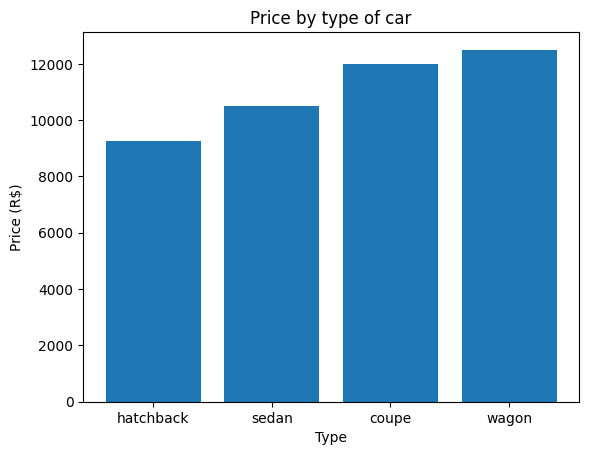

In [18]:
type_price = v_clean.groupby('type')['price'].median().sort_values(ascending=True)
plt.bar(type_price.index, type_price.values)
plt.xlabel('Type')
plt.ylabel('Price (R$)')
plt.title('Price by type of car')


**Comment:** There is correlation between the car condition and its price, also between the type of car and the price. However, there seems not to exist correlation between price and size, transmission, fuel or nº of cylinders.

## Feature engineering

C:\Users\davig\AppData\Local\Temp\ipykernel_13480\1800767852.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Price by type and size of car')

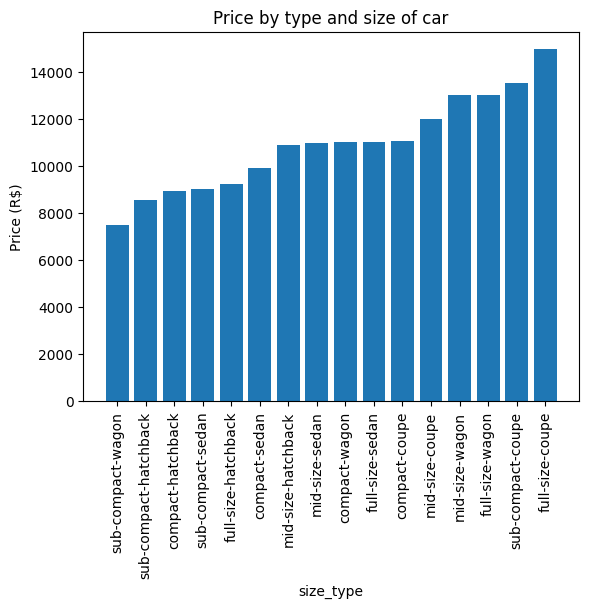

In [19]:
#Trying to combine size and type to see if it is more correlated to price than type alone
v_clean['size_type'] = v_clean['size']+"-"+v_clean['type']
size_type_price = v_clean.groupby('size_type')['price'].median().sort_values(ascending=True)
fig, ax = plt.subplots()
ax.bar(size_type_price.index, size_type_price.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('size_type')
plt.ylabel('Price (R$)')
plt.title('Price by type and size of car')


**Comment:** It appears that the combined size_type is more correlated than only the type variable. To check this, we could run a Pearson correlation test. For now, we'll just use this variable.

# Pipeline and model construction

In [20]:
from pandas import get_dummies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

## Functions

In [21]:
def normalize_and_get_dummies(data: pd.DataFrame) -> pd.DataFrame:
    """Normalizes year and odometer and encodes categorical variables into dummy variables"""
    
    data = get_dummies(data)

    #Normalizing the numerical variables
    data['year'] = (data['year'] - 2001)
    data['odometer'] = (data['odometer'] - data['odometer'].min()) / (data['odometer'].max() - data['odometer'].min())
    
    return data

In [22]:
def remove_categories(data: pd.DataFrame) -> pd.DataFrame:
    """Removes categories according to EDA"""
    #Creating the size_type feature
    data['size_type'] = data['size']+"-"+data['type']

    #Dropping size, cylinders, type, fuel and transmission, after EDA
    data.drop(columns=['size', 'cylinders', 'type', 'fuel', 'transmission'], inplace=True)

    return data

In [23]:
def add_year_squared(data: pd.DataFrame) -> pd.DataFrame:
    """Adds one column of the value of the year squared"""
    
    data.insert(2, 'year_squared',data['year']**2)
    
    return data

In [24]:
def transformations(data: pd.DataFrame, are_cat_removed:bool, is_year_squared: bool) -> pd.DataFrame:
    """Pipeline with remove_categories, normalizing, getting dummies transformations
    if add_year_squared is true, adds a collumn with the year squared"""

    if(are_cat_removed == True):    
        data = remove_categories(data)

    if(is_year_squared == True):
        data = add_year_squared(data)

    data = normalize_and_get_dummies(data)
    
    return data

In [25]:
def get_arrays(data: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """ Recieves the clean data frame and returns matrix X and array d, according to the course's definitions"""

     # Column vector with prices
    d = data['price']

    # Data matrix (all features except prices)
    data.drop('price', axis=1, inplace=True)
    X = data

    return X.to_numpy(), d.to_numpy()

In [26]:
def regression(X: np.ndarray, d: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # Method showed in class
    R = X.T @ X
    p = X.T @ d
    wo = np.linalg.solve(R,p)
    fitting_error = d - X @ wo

    return wo, fitting_error

## Model fitting and evaluation

In [27]:
v_clean_train = pd.read_csv("./vehicles_cleaned_train.csv")    
v_clean_test = pd.read_csv("./vehicles_cleaned_test.csv")

are_cat_removed_vals = [True, False]
is_year_squared_vals = [True, False]
mse_train = [0, 0, 0, 0]
mse = [0, 0, 0, 0]

In [28]:
i = 0
for are_cat_removed_val in are_cat_removed_vals:
    for is_year_squared_val in is_year_squared_vals:
        print(f"---- remove_categories: {are_cat_removed_val}, add_year_squared: {is_year_squared_val} ----")
        # Fitting the linear model
        v_clean_train = pd.read_csv("./vehicles_cleaned_train.csv")    
        v_clean_test = pd.read_csv("./vehicles_cleaned_test.csv")
        train_data = v_clean_train
        train_data_transf = transformations(data=train_data, are_cat_removed=are_cat_removed_val, is_year_squared=is_year_squared_val)
        X_train, d_train = get_arrays(data=train_data_transf)
        wo, fitting_error = regression(X=X_train, d=d_train)
        mse_train[i] = np.mean(fitting_error**2)
        print(f"Fitting MSE error: {np.mean(fitting_error**2)}")
        print(f"Fitting RMSE error: {np.sqrt(np.mean(fitting_error**2))}")

        #Evaluating the linear model
        test_data = v_clean_test
        test_data_transf = transformations(data=test_data, are_cat_removed=are_cat_removed_val, is_year_squared=is_year_squared_val)
        X_test, d_test = get_arrays(data=test_data_transf)
        prices_prediction = X_test @ wo
        print(f"Evaluating MSE error: {np.mean((prices_prediction - d_test)**2)}")
        print(f"Evaluating RMSE error: {np.sqrt(np.mean((prices_prediction - d_test)**2))}")
        mse[i] = np.mean((prices_prediction - d_test)**2)
        i += 1

---- remove_categories: True, add_year_squared: True ----
Fitting MSE error: 28678962.344645835
Fitting RMSE error: 5355.27425484875
Evaluating MSE error: 27365926.43329515
Evaluating RMSE error: 5231.245208675956
---- remove_categories: True, add_year_squared: False ----
Fitting MSE error: 28960469.86187793
Fitting RMSE error: 5381.493274350339
Evaluating MSE error: 27599592.4528602
Evaluating RMSE error: 5253.531426846155
---- remove_categories: False, add_year_squared: True ----
Fitting MSE error: 27218338.30753545
Fitting RMSE error: 5217.119732911585
Evaluating MSE error: 25588037.897443153
Evaluating RMSE error: 5058.46200909359
---- remove_categories: False, add_year_squared: False ----
Fitting MSE error: 27519261.919665784
Fitting RMSE error: 5245.880471347568
Evaluating MSE error: 25857605.28760358
Evaluating RMSE error: 5085.037392940545


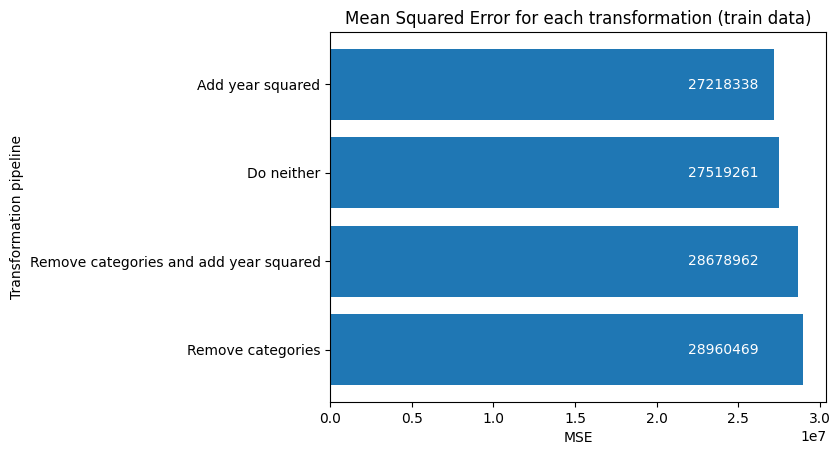

In [32]:
error_legend = ['Remove categories and add year squared',
                'Remove categories',
                'Add year squared',
                'Do neither'
                ]
sorted_error = sorted(zip(mse_train, error_legend), reverse=True)
sorted_mse_train, sorted_legend = zip(*sorted_error)
plt.barh(sorted_legend, sorted_mse_train)

plt.text(sorted_mse_train[0]-0.7e7, 'Add year squared', str(int(sorted_mse_train[3])), va='center', color='white')
plt.text(sorted_mse_train[0]-0.7e7, 'Do neither', str(int(sorted_mse_train[2])), va='center', color='white')
plt.text(sorted_mse_train[0]-0.7e7, 'Remove categories and add year squared', str(int(sorted_mse_train[1])), va='center', color='white')
plt.text(sorted_mse_train[0]-0.7e7, 'Remove categories', str(int(sorted_mse_train[0])), va='center', color='white')

plt.title('Mean Squared Error for each transformation (train data)')
plt.ylabel('Transformation pipeline')
plt.xlabel('MSE')
plt.show()

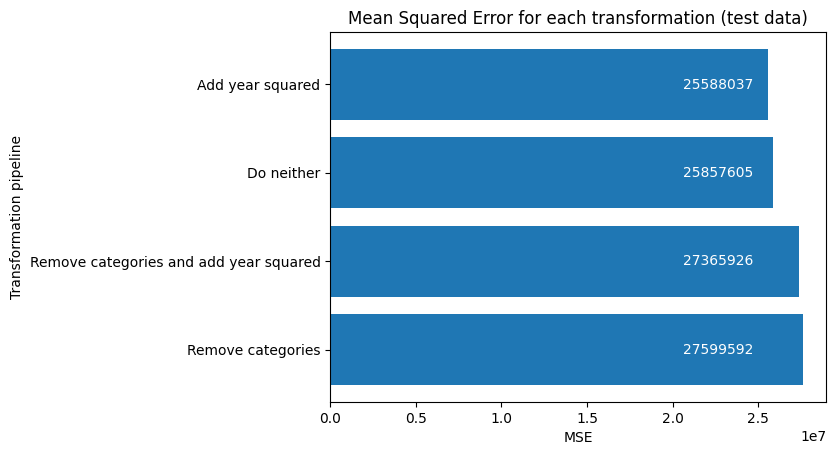

In [33]:
error_legend = ['Remove categories and add year squared',
                'Remove categories',
                'Add year squared',
                'Do neither'
                ]
sorted_error = sorted(zip(mse, error_legend), reverse=True)
sorted_mse, sorted_legend = zip(*sorted_error)
plt.barh(sorted_legend, sorted_mse)

plt.text(sorted_mse[0]-0.7e7, 'Add year squared', str(int(sorted_mse[3])), va='center', color='white')
plt.text(sorted_mse[0]-0.7e7, 'Do neither', str(int(sorted_mse[2])), va='center', color='white')
plt.text(sorted_mse[0]-0.7e7, 'Remove categories and add year squared', str(int(sorted_mse[1])), va='center', color='white')
plt.text(sorted_mse[0]-0.7e7, 'Remove categories', str(int(sorted_mse[0])), va='center', color='white')

plt.title('Mean Squared Error for each transformation (test data)')
plt.ylabel('Transformation pipeline')
plt.xlabel('MSE')
plt.show()

# Resultados finais

1. Conforme os resultados obtidos nos testes, as variáveis de entrada que geraram o menor erro quadrático médio foram:
    - price, year, year^2, condition, cylinders, fuel, odometer, transmission, size e type

Esse resultado é fruto da análise exploratória e da comparação entre os erros finais obtidos. Note que a feature size-type não foi utilizada, pois sua adição aconteceria na função 'add_categories'. Em futuras versões do notebook, poderia-se testar adicioná-la e manter as outras categorias, para avaliar o erro.

2. O código utilizado para calcular o vetor wo e o erro quadrático médio considerando os dados de treinamento:


```
train_data = v_clean_train
train_data_transf = transformations(data=train_data, are_cat_removed=are_cat_removed_val, is_year_squared=is_year_squared_val)
X_train, d_train = get_arrays(data=train_data_transf)
wo, fitting_error = regression(X=X_train, d=d_train)
print(f"Fitting MSE error: {np.mean(fitting_error**2)}")
print(f"Fitting RMSE error: {np.sqrt(np.mean(fitting_error**2))}")
```
onde a função de regressão é:
```
def regression(X: np.ndarray, d: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    R = X.T @ X
    p = X.T @ d
    wo = np.linalg.solve(R,p)
    fitting_error = d - X @ wo

    return wo, fitting_error
```

3. O código utilizado para calcular o erro com os dados de teste:

```
X_test, d_test = get_arrays(data=test_data_transf)
        prices_prediction = X_test @ wo
        print(f"Evaluating MSE error: {np.mean((prices_prediction - d_test)**2)}")
```

4. O menor erro quadrático médio para dados de treinamento foi igual a 27.218.338,31. O menor erro quadrático médio para dados de teste foi igual a 25.588.037,89.